In [108]:
%matplotlib inline 
# this just tells the notebook to display images in the cells, rather than send it to a new window
try:
    # library for nicer visualizations
    import seaborn
    seaborn.set_context('notebook')
except ImportError:
    pass

# Pandas and Databases

## *'If you torture the data long enough, it will confess.'*
*– Master Turtle*

Databases are collections of **tables**, organized into **columns** and **rows**, that allow us to store, select, and relate data to each other. The most common language is SQL, which comes in various forms.

`pandas` is a library (i.e., a code collection) of useful functions and objects to work with data. It can read from a variety of formats (CSV, Excel, ...), including SQL databases, and has a load of nifty tools to analyze and visualize the data.

# Databases

## Selecting data

In SQL, keywords are typically written in CAPS, as to distinguish them from variable names. The general command to get data from a DB is

```sql
SELECT <columns> FROM <table>
```

`<columns>` is a comma separated list of the column names we want. If we want **all** columns, we can use the Kleene star `*`.

### DISTINCT

If we want unique entries, we can use the `DISTINCT` keyword:
```sql
SELECT DISTINCT <columns> FROM <table>
```

This automatically gets rid of duplicates.

### WHERE

If we want only entries that fulfill a certain condition, we can use the `WHERE` keyword:
```sql
SELECT <columns> FROM <table> WHERE <condition>
```

`<condition>` is similar to a boolean statement in Python, but you don't need double equals for comparison. 

```sql
SELECT * FROM tweets WHERE followers > 100
```

You can also combine several conditions with `AND` and `OR`.

```sql
SELECT * FROM tweets WHERE followers > 100 AND is_retweet = 'False'
```



### LIMIT

Databases can be massive (that's kind of their point), so when you only want a bit to explore first, use the `LIMIT` keyword:
```sql
SELECT <columns> FROM <table> LIMIT <N>
```

`<N>` is the maximum number of entries you want

## Activity

Suppose you have a table called `movies` with the following columns:

<table>
    <tr>
        <th>name</th>
        <th>director</th>
        <th>year</th>
        <th>cost</th> 
        <th>gain</th>
    </tr>
</table>

How would you select
* the unique names of all the directors?
* all rows with films made in 1992?
* all films made before 2010 that cost under 10M?
* the top 10 films made in 2001 that made over 10M?

## Databases in Python

In order to use SQL in Python, we need a library called `sqlite3`.

In [1]:
import sqlite3 # this library allows us to connect to a database

First, we need to establish a connection to the database. We use the `connect()` function:

In [10]:
connection_to_db = sqlite3.connect('../data/example.db')

Databases can contain several **tables**, so before we proceed, it's a good idea to check how many we have and how they are called. To do this, we first need a **cursor** (think of it as an iterator over the table), and then execute an **SQL command**:

In [11]:
cursor = connection_to_db.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('reviews',)]


# `pandas`

In [7]:
import pandas as pd # import pandas, but give it a shorthand name

`pandas` let's us read a table directly into Python. We just need a connection and a SQL command.

In [12]:
df = pd.read_sql("SELECT * FROM reviews", con=connection_to_db)

The result of this process is a new object, called a **`DataFrame`**. You can think of it as a table on steroids.

`pandas` can read all kinds of *X*-separated files (using `read_csv()`), as well as Excel (`read_excel`).

By default, `read_csv()` uses commas `,` as separators, but we can tell it to use any other separator, for example tabs `\t` instead.

Now, we can look at the data. The file is rather big, so we will only look at the top 5 lines. We use the `head()` function for it.

The top row contains the column names.

In [15]:
df.tail()

,index,score,category,uid,gender,age,text
117070,117070,2,Bathroom,7854275,M,57,Ordered a basin waste ten days ago with a deli...
117071,117071,1,Hospital Equipment,8241333,M,37,I bought a mobility scooter for my elderly mot...
117072,117072,5,Domestic Appliances,2686431,M,32,"Very nice clear website , good prices and fast..."
117073,117073,5,Fragrances,2365806,F,56,"Good Prices , easy to use website , quick deli..."
117074,117074,5,Hotels,2365806,F,55,Booked London Hotel from hidden gems - Doublet...


If you want to look at more lines, you need to give that number to the function as argument.

We can also look at the bottom rows, with `tail()`

## Activity: Loading data

* create a new variable, `scores`, and read in the distinct scores from the SQL table
* look at the last 3 lines of `scores`

In [22]:
# your code here
scores = pd.read_sql("SELECT DISTINCT score FROM reviews", con=connection_to_db)
print(scores.tail())

   score
0      5
1      4
2      1
3      2
4      3


# Indexing

### Columns

DataFrames, as well as databases, are organized in columns with names. To get an overview, use the `columns` attribute.

In [26]:
df.columns

Index(['index', 'score', 'category', 'uid', 'gender', 'age', 'text'], dtype='object')

To see just one column, access it with the same square bracket notation as for lists `[]`. However, rather than a number, use the column name string.

Alternatively, you can treat the name like an attribute of the `DataFrame`, and use a dot operator.

In [28]:
# Dictionary-style indexing
texts1 = df['text']

# Alternative syntax
texts2 = df.text

# check whether the Series are the same
print(texts1 is texts2)
print(texts1)

True
0         Prices change daily and if you want to really ...
1         and the fact that they will match other compan...
2         Used Paypal for my buying and selling for the ...
3         I ' ve made two purchases on CJ ' s for Fallou...
4         I was very happy with the diamond that I order...
5         I signed up with front point security 0 months...
6         First off I usually never get extended warrant...
7         The games come , no worries , they are reputab...
8         We worked hard to send out email invitations f...
9         I am in love with all the free movies and show...
10        I ordered two pieces for a halloween party in ...
11        Everything about this site is pleasing , from ...
12        As soon as you make your claim , they are on i...
13        Excellent service , I have only found a cheape...
14        I always appreciate a dealer that takes the ti...
15        I ' ve used Supplement Warehouse several times...
16        Prices are way better tha

The column returned from such an indexing is called a `Series` object.

To select several columns, we need to use the first method, and give it a list of column names. This returns a new `DataFrame` object.

In [31]:
print(type(df.text))
print(type(df[['text', 'score']]))
df[['text', 'score']]

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,text,score
0,Prices change daily and if you want to really ...,5
1,and the fact that they will match other compan...,5
2,Used Paypal for my buying and selling for the ...,5
3,I ' ve made two purchases on CJ ' s for Fallou...,5
4,I was very happy with the diamond that I order...,4
5,I signed up with front point security 0 months...,5
6,First off I usually never get extended warrant...,5
7,"The games come , no worries , they are reputab...",5
8,We worked hard to send out email invitations f...,1
9,I am in love with all the free movies and show...,4


#### Series functions

There are a lot of functions to analyze a `Series` object. One of the most useful is `describe()`, which gives us some descriptive statistics. Some of the ones used here, like `count()`, `mean()`, `max()`, and `min()` can be called by themselves.

In [35]:
df.score.describe()

count    117075.000000
mean          4.495939
std           1.151152
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: score, dtype: float64

## Activity

* what are the mean and median of the `age` column?
* what do you get when you use describe on a column with strings, like `text` or `gender`?

In [41]:
# your code here
print('mean={}, median={}'.format(df['age'].mean(), df['age'].median()))
df['text'].apply(str).describe()

mean=41.550800768737986, median=41.0


count                                                117075
unique                                               116992
top       The item arrived the day after I ordered it ! ...
freq                                                     15
Name: text, dtype: object

### Adding new columns

Let's create a new column `ratio`, i.e., the amount of score per year of age, based on the existing columns `score` and `age`.

In [51]:
df['ratio'] = (df.score / df.age)
df.head()
# df.ratio.describe()

,index,score,category,uid,gender,age,text,ratio
0,0,5,Car Rental,899881,F,50,Prices change daily and if you want to really ...,0.100000
1,1,5,Fitness & Nutrition,828184,M,32,and the fact that they will match other compan...,0.156250
2,2,5,Electronic Payment,1698375,M,48,Used Paypal for my buying and selling for the ...,0.104167
3,3,5,Gaming,3324079,M,29,I ' ve made two purchases on CJ ' s for Fallou...,0.172414
4,4,4,Jewelry,719816,F,29,I was very happy with the diamond that I order...,0.137931


This new column is listed in the `df` object (but not added to the database we read in):

In [54]:
df.columns

Index(['index', 'score', 'category', 'uid', 'gender', 'age', 'text', 'ratio'], dtype='object')

## Correlations

Since we used two exsitng qunatities, there is now some correlation in the data. Let's check. Luckily, there's a function for that: `corr()`.

In [95]:
df_no_nan[['age', 'score', 'ratio']].corr()

,age,score,ratio
age,1.000000,0.061826,-0.737078
score,0.061826,1.000000,0.535871
ratio,-0.737078,0.535871,1.000000


## String Columns

If we have a column containing strings (like here `text`), we can apply a whole range of functions we know from `str`, such as `len()`, `lower()`, `isalpha()`, etc.
You can find a full list at [https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#extracting-substrings](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#extracting-substrings)

In [103]:
print(df['gender'].str.lower())

0         f
1         m
2         m
3         m
4         f
5         f
6         m
7         m
8         f
9         f
10        f
11        f
12        f
13        m
14        f
15        m
16        f
17        m
18        f
19        f
20        m
21        f
22        m
23        m
24        m
25        f
26        f
27        f
28        m
29        f
         ..
117045    m
117046    f
117047    f
117048    m
117049    m
117050    f
117051    f
117052    m
117053    m
117054    m
117055    m
117056    m
117057    m
117058    f
117059    f
117060    m
117061    f
117062    f
117063    f
117064    m
117065    m
117066    m
117067    m
117068    m
117069    m
117070    m
117071    m
117072    m
117073    f
117074    f
Name: gender, Length: 117075, dtype: object


## apply()

We can also apply a function to an entire `Series`. The most common case is casting a column to make sure every entry has the same data type.

In [105]:
df['score'].apply(float)[:10]

0    5.0
1    5.0
2    5.0
3    5.0
4    4.0
5    5.0
6    5.0
7    5.0
8    1.0
9    4.0
Name: score, dtype: float64

However, functions can be arbitraily complex: Let's write a simple function that sets the value according to our `age` `Series`.

In [106]:
def f(x):
    if x > 65:
        return 'retired'
    else:
        return 'not_retired'
    
df_no_nan['status'] = df_no_nan.age.copy().apply(f)
df_no_nan.head()

,index,score,category,uid,gender,age,text,ratio,has_price,status
0,0,5,Car Rental,899881,F,50,Prices change daily and if you want to really ...,0.100000,True,not_retired
1,1,5,Fitness & Nutrition,828184,M,32,and the fact that they will match other compan...,0.156250,False,not_retired
2,2,5,Electronic Payment,1698375,M,48,Used Paypal for my buying and selling for the ...,0.104167,False,not_retired
3,3,5,Gaming,3324079,M,29,I ' ve made two purchases on CJ ' s for Fallou...,0.172414,False,not_retired
4,4,4,Jewelry,719816,F,29,I was very happy with the diamond that I order...,0.137931,False,not_retired


## Rows

Retrieving a row is also possible, but uses a different method, `iloc` (for **i**nteger **loc**ation), and the index of the row.

In [44]:
df.iloc[2]

index                                                       2
score                                                       5
category                                   Electronic Payment
uid                                                   1698375
gender                                                      M
age                                                        48
text        Used Paypal for my buying and selling for the ...
Name: 2, dtype: object

As with lists, you can also use slices, and even lists of integers:

In [48]:
print(df.text.iloc[2:4])
print()
print(df.text.iloc[[1,1,5,11]])

2    Used Paypal for my buying and selling for the ...
3    I ' ve made two purchases on CJ ' s for Fallou...
Name: text, dtype: object

1     and the fact that they will match other compan...
1     and the fact that they will match other compan...
5     I signed up with front point security 0 months...
11    Everything about this site is pleasing , from ...
Name: text, dtype: object


## Masks

Say we want to remove all ratios below a certain threshold.

In dataframes, we can select all the data that matches a certain condition, similar to an SQL table. We can do that with a simple boolean statement. The result is a `Series` object with boolean values, also called a **mask**:

In [56]:
too_low = df['ratio'] < 0.1
print(too_low.head())
print(type(too_low))

0    False
1    False
2    False
3    False
4    False
Name: ratio, dtype: bool
<class 'pandas.core.series.Series'>


## Activity

* add another, boolean, column to `df`, that signals whether the entry contains the word `price`. Call the new column `has_price`

In [63]:
# your code here
df['has_price'] = df['text'].str.contains('price')

We can combine several conditions with the `&` or `|` operators.

In [65]:
over50 = df.age >= 50

print(len(df), len(df[too_low | over50]), len(df[too_low & over50]))

117075 47952 34144


If we apply this mask to our DataFrame, we get *only* the rows where the condition is `True`

In [69]:
df[too_low & over50].iloc[[1, 10]]

,index,score,category,uid,gender,age,text,ratio,has_price
6,6,5,Electronics,6929926,M,69,First off I usually never get extended warrant...,0.072464,False
66,66,5,Camping,2635242,M,51,"Easy website to navigate , great prices , clea...",0.098039,True


The value for `ratio`, `NaN`, stands for  "**N**ot **a** **N**umber". Luckily, we can replace that value with `fillna()`

In [77]:
df_no_nan = df.fillna('THIS WAS NAN')
df_no_nan

,index,score,category,uid,gender,age,text,ratio,has_price
0,0,5,Car Rental,899881,F,50,Prices change daily and if you want to really ...,0.100000,True
1,1,5,Fitness & Nutrition,828184,M,32,and the fact that they will match other compan...,0.156250,False
2,2,5,Electronic Payment,1698375,M,48,Used Paypal for my buying and selling for the ...,0.104167,False
3,3,5,Gaming,3324079,M,29,I ' ve made two purchases on CJ ' s for Fallou...,0.172414,False
4,4,4,Jewelry,719816,F,29,I was very happy with the diamond that I order...,0.137931,False
5,5,5,Security Equipment,5630105,F,66,I signed up with front point security 0 months...,0.075758,False
6,6,5,Electronics,6929926,M,69,First off I usually never get extended warrant...,0.072464,False
7,7,5,Gaming,2364273,M,20,"The games come , no worries , they are reputab...",0.250000,False
8,8,1,Media & Marketing,2561769,F,32,We worked hard to send out email invitations f...,0.031250,False
9,9,4,Shoes,2561769,F,32,I am in love with all the free movies and show...,0.125000,False


## Visualization

### Histograms

`pandas` `DataFrame`s have built-in visualization methods under the property `plot`. To get a histogram of the ratios, we can call `hist()`

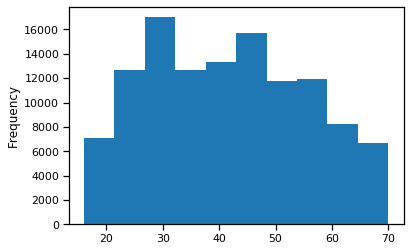

In [109]:
df_no_nan['age'].plot.hist()

In order to get a different representation, let's define the size of each `bin`. Adding `;` at the end of the line prevents the output of the `<matplotlib.axes._subplots.AxesSubplot at 0x118903320>` text.

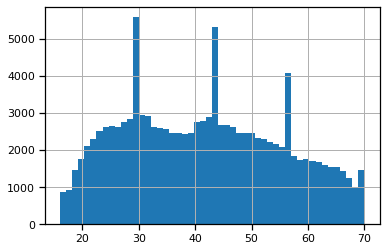

In [110]:
df_no_nan.age.hist(bins=50);

We can even separate the plots by another column, for example `gender`, using the keyword `by`.

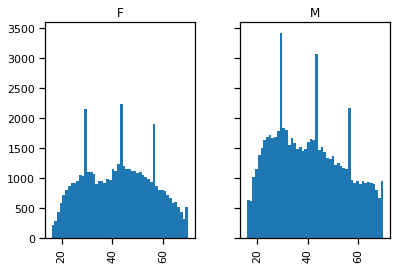

In [111]:
df_no_nan['age'].hist(by=df_no_nan['gender'], bins=50, sharey=True);

Looks similar, but at different scales. To make the y-axis equivalent, use `sharey`

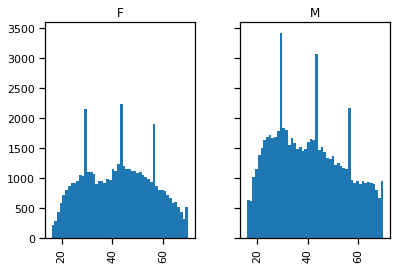

In [112]:
df_no_nan.age.hist(by=df_no_nan.gender, bins=50, sharey=True);

### Scatterplotting

If we are interested in more than one column, we might want to use the general `plot` method, and the `scatter` function. We need to define the `x` and `y` dimensions by giving a column name from our `DataFrame`.

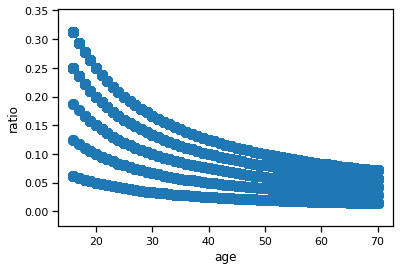

In [113]:
df_no_nan.plot.scatter(x='age', y ='ratio', s=100, alpha=0.5);

To separate the two categories, you need to 
* make the first one a variable
* pass the variable to the second via `ax`
* set different colors

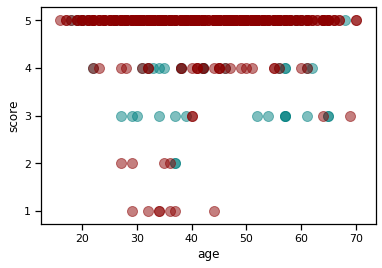

In [114]:
axis = df_no_nan[df_no_nan.category == 'Gambling'].plot.scatter(x='age', y ='score', color='teal', s=100, alpha=0.5);
df_no_nan[df_no_nan.category == 'Sport'].plot.scatter(x='age', y ='score', color='darkred', ax=axis, s=100, alpha=0.5);

For many more plotting options, see [https://pandas.pydata.org/pandas-docs/stable/visualization.html](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

For more on visualizations in general, see [http://serialmentor.com/dataviz/](http://serialmentor.com/dataviz/)

## Views

We can subselect a number of columns via slicing (a *view*) and put them in a new `DataFrame`by using `copy()`.

In [96]:
new_view = df_no_nan[['age', 'score', 'category', 'text']].copy()
new_view.head()

,age,score,category,text
0,50,5,Car Rental,Prices change daily and if you want to really ...
1,32,5,Fitness & Nutrition,and the fact that they will match other compan...
2,48,5,Electronic Payment,Used Paypal for my buying and selling for the ...
3,29,5,Gaming,I ' ve made two purchases on CJ ' s for Fallou...
4,29,4,Jewelry,I was very happy with the diamond that I order...


## Grouping

We can group our data by columns. This is useful for example in visualization. Rather than showing two plots as before, we can overlay them (we use `alpha` to set the transparency):

In [101]:
new_view.groupby('score').median()#score.plot.hist(bins=20, alpha=0.5);

,age
score,
1,38
2,41
3,40
4,38
5,42


We can also get aggregate statistics for the groups. We use `groupby()`, and then specify how to aggregate the data. Possible aggregators are
* `sum()`
* `count()`
* `min()`
* `max()`
* `mean()`
* `median()`

... and many more. See [https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) for more examples